<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw3/humDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pulling Human Development Index data
Data from Wikipedia page, [List of countries by Human Development Index](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index)

In [52]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
# Open and read in the page content from Wikipedia
pageaddress = "https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index"
soup = BeautifulSoup(urlopen(pageaddress), "html.parser")

In [54]:
table = soup.find_all('table', {'class': "wikitable"})[0]
rawData = pd.read_html(str(table),header=1)
print(rawData[0])

    2019 data (2020 report)​[10] Change over 5 years (2014)​[2]  \
0    Very high human development    Very high human development   
1                              1                            NaN   
2                              2                            (7)   
3                              2                            NaN   
4                              4                            (7)   
..                           ...                            ...   
188                          185                            (5)   
189                          185                            (3)   
190                          187                            (1)   
191                          188                            (1)   
192                          189                            (1)   

            Country or Territory 2019 data (2020 report)​[10].1  \
0    Very high human development    Very high human development   
1                         Norway                          0.9

In [55]:
df = rawData[0]
df = df.drop([0])
df = df.drop(columns=['Unnamed: 5'])

In [56]:
# Rename key variables to be more friendly
df = df.rename(columns={"2019 data (2020 report)​[10].1": "HDI_2019", "Average annual HDI growth (2010-2019)​[2]": "HDI_growth"})

# Remove rows containing "section headers" from Wikipedia (e.g. "High human development", "Medium human development", ...)
df = df[~df['HDI_2019'].str.contains("development")]

In [58]:
# save data as a CSV
df.to_csv('HDI_data.csv')

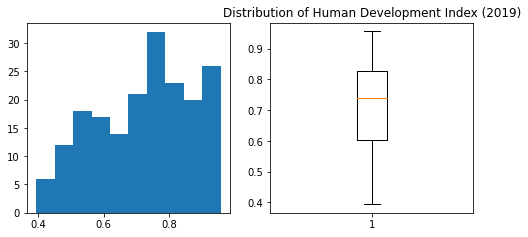

In [76]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize =(8, 3.5))
ax1.hist(df['HDI_2019'].astype(float))
ax2.boxplot(df['HDI_2019'].astype(float))
plt.title('Distribution of Human Development Index (2019)')
plt.show()